In [1]:
Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

File and Data Field Descriptions

train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

SyntaxError: unterminated string literal (detected at line 3) (864952850.py, line 3)

### Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions:

    <>train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    <>PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is  their number within the group. People in a group are often family members, but not always.
    <>HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    <>CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    <>Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    <>Destination - The planet the passenger will be debarking to.
    <>Age - The age of the passenger.
    <>VIP - Whether the passenger has paid for special VIP service during the voyage.
    <>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    <>Name - The first and last names of the passenger.
    <>Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
    
test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

In [3]:
# Import Libraries

# Data wrangling
import pandas as pd
import numpy as np
# import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import Files
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [5]:
# Inspect
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train[["Group", "ID"]]=train.PassengerId.str.split("_", expand=True).head()


In [7]:
train.drop(columns=['PassengerId'], inplace=True)

In [27]:
train.isnull().sum().sort_values(ascending=False)

Group           8688
ID              8688
CryoSleep        217
ShoppingMall     208
VIP              203
HomePlanet       201
Name             200
Cabin            199
VRDeck           188
FoodCourt        183
Spa              183
Destination      182
RoomService      181
Age              179
Transported        0
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

## EXPLOROTARY DATA ANALYSIS


### Categorical Variables : HomePlanet, CryoSleep, Destination,VIP


##### 1. HomePlanet

In [8]:
train.HomePlanet.value_counts(dropna=False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [9]:
#Mean "Transported" by HomePlanet

train[['HomePlanet', 'Transported']].groupby('HomePlanet', as_index=False).mean().sort_values(by= 'Transported', ascending=False)

# Europa, Mars, Earth

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


Text(0.5, 1.0, 'Transported Probability by Home Planet')

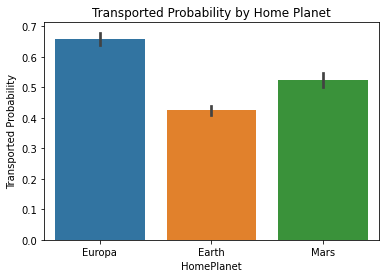

In [10]:
sns.barplot(x = 'HomePlanet', y ='Transported', data = train)
plt.ylabel('Transported Probability')
plt.title('Transported Probability by Home Planet')

# Comment: Female passengers are more likely to survive

##### 2. Destination

In [11]:
train['Destination'].value_counts(dropna=False)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64

In [12]:
# Mean "Transported" by Destination
train[["Destination", "Transported"]].groupby('Destination', as_index=False).mean().sort_values(by="Transported", ascending=False)

# 55 Cancri e, PSO J318.5-22, TRAPPIST-1e

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


Text(0.5, 1.0, 'Transported Probability by Destination')

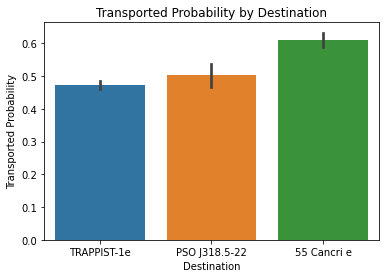

In [13]:
sns.barplot(x="Destination", y="Transported", data=train)
plt.ylabel('Transported Probability')
plt.title('Transported Probability by Destination')

##### 3. CryoSleep

In [14]:
train.CryoSleep.value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [ ]:
# Mean "Transpored" by CryoSleep 

train[['CryoSleep', 'Transported']].groupby("CryoSleep", as_index=False).mean().sort_values(by="Transported", ascending=False)

# True, False

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


Text(0, 0.5, 'Transported Probability by CryoSleep')

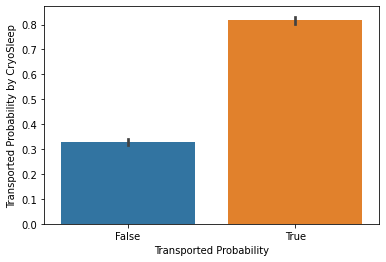

In [15]:
sns.barplot(x="CryoSleep", y="Transported", data=train)
plt.xlabel("Transported Probability")
plt.ylabel("Transported Probability by CryoSleep")

##### 4. VIP

In [16]:
train.VIP.value_counts(dropna=False)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

In [17]:
# Mean "Transported" by VIP 

train[['VIP', 'Transported']].groupby("VIP", as_index=False).mean().sort_values(by="Transported", ascending=False)

# False, True

,VIP,Transported
0,False,0.506332
1,True,0.381910


Text(0, 0.5, 'Transported Probability by VIP')

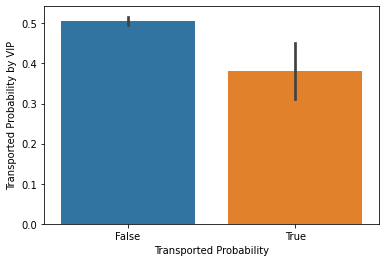

In [18]:
sns.barplot(x="VIP", y="Transported", data=train)
plt.xlabel("Transported Probability")
plt.ylabel("Transported Probability by VIP")

### FILL MISSING TEST VALUES

In [ ]:
def fill_miss(data, target_column: str, cond_column1: str, cond_column2: str, cond_value1: str, cond_value2, fill):
    common= data[target_column].isna()
    condition= [(data[cond_column1]>= cond_value1) & (data[cond_column2]== cond_value2) & (common)]
    fill_with= [fill]
    data[target_column]= np.select(condition, fill_with, default= data[target_column].values)